<a href="https://colab.research.google.com/github/Leo646/IA_MachineLearning/blob/master/Proyecto_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load
%matplotlib inline

#**UNIVERSIDAD NACIONAL DE LOJA**

####**Carrera de Ingenieria en Sistemas** 



1.   Leonardo Paredes



##**1.  Introduccion**




El presente proyecto tiene como objetivo el análisis exploratorio de datos de un  dataset denominado "Student Performance Data Set (conjunto de datos de rendimiento del estudiante)", estos datos abordan el rendimiento de los estudiantes en la educación secundaria de dos escuelas portuguesas. Los atributos de los datos incluyen calificaciones de los estudiantes, características demográficas, sociales y relacionadas con la escuela.


###**1.  Cargar Datos**

El primer paso es cargar los datos necesarios. Se debe utilizar  el comando read_csv de la biblioteca pandas para cargar el conjunto de datos "Student Performance Data Set". Después de cargar los datos en un marco de datos, se muestra la parte superior del conjunto de datos. La URL donde se puede descarg el conjunto de datos es la siguiente: https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [4]:
url='https://raw.githubusercontent.com/Leo646/IA_MachineLearning/master/Dataset/student-mat.csv'
df = pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


###**2. Analisis y Exploracion de los Datos**

Después de cargar el conjunto de datos en un marco de datos en la memoria, el siguiente paso es realizar un análisis de datos exploratorio. El objetivo de la AED es descubrir la mayor cantidad de información posible sobre el conjunto de datos. El método describe() es un buen punto de partida. E




####**2.1 de Variables**

In [ ]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### **TIPOS DE VARIABLES**
**Cualitativas (categóricas)**


*   **Nominales**
  *   Sexo
  *   Mjob(trabajo de la madre)
  *   Fjob(trabajo del padre)
  *   razón(razón para elegir esta escuela)
  *   tutor(tutor del estudiante)
  *   familia
  *   tiempo libre
  *   salidas
  *   Dalc
  *   Walc
  *   salud

*   **Binarios**
  *   Escuela
  *   dirección
  *   famsize
  *   Pstatus
  *   schoolup
  *   Famsup
  *   actividades
  *   pagadas
  *   guardería
  *   superior
  *   internet
  *   romantico

*    **Ordinales**
  *   Medu
  *   Fedu 

**Cuantitativas (numéricas)**

*    **Discretas**
  *   edad
  *   ausencias

*    **Continuas**
  *   tiempo de viaje
  *   tiempo de estudio
  *   fallas
  *   G1
  *   G2
  *   G3


**Representación Gráfica de las notas finales de los estudiantes**



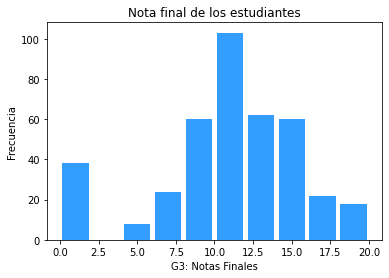

In [ ]:
df['G3'].describe()
plt.hist(x=df['G3'], color='#339EFF', rwidth=0.85)
plt.title('Nota final de los estudiantes')
plt.xlabel('G3: Notas Finales')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

**Minimo y maximo **


In [ ]:
minimo = df['G3'].min()
maximo = df['G3'].max()
print('El minimo es: ', minimo )
print('El maximo es: ', maximo )


El minimo es:  0
El maximo es:  20


**Promedio de los tres parciales(G1,G2 y G3)**

¿Es bueno el rendimiento de los estudiantes en los tres parciales?

In [ ]:
Periodo1=df['G1'].mean()
Periodo2=df['G2'].mean()
Periodo3=df['G3'].mean()
print('Promedio del primer parcial: ', Periodo1 )
print('Promedio del segundo parcial: ', Periodo2 )
print('Promedio del tercer parcial: ', Periodo3 )

Promedio del primer parcial:  10.90886075949367
Promedio del segundo parcial:  10.713924050632912
Promedio del tercer parcial:  10.415189873417722


**Determinar graficamente el tiempo que dedica un estudiante al estudio**
¿Cual es el tiempo que dedican los estudiantes al estudio?

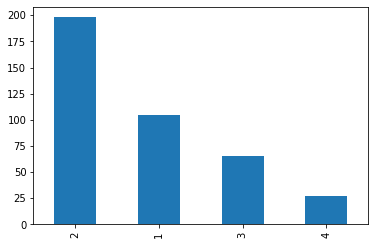

In [ ]:

df['studytime'].value_counts().plot.bar()

**Determinar la relacion que existe entre tiempo de estudio y notas finales**

¿Cunto mas tiempo dedican los estudiantes al estudio mejores notas obtienen?

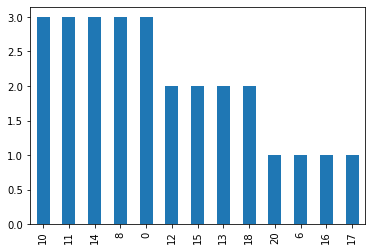

In [ ]:
df[df['studytime']==4]['G3'].value_counts().plot.bar()

Gráficamente se puede observar que si el tiempo de estudio es mayor o igual a 2, van haber una gran mayoría de estudiantes que llegarán a tener como mejor nota  un 11 mientras que hay una minoria mas o menos de 1 o 2   estudiantes que puedan  tener una nota de 20 en su parcial final

**Relación entre tiempo de estudio(cuando equivale a  4 h) y notas del segundo parcial** 

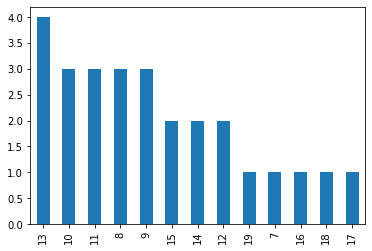

In [ ]:
df[df['studytime']==4]['G2'].value_counts().plot.bar()

**Relación entre tiempo de estudio(cuando equivale a 4 h) y notas del primer parcial**

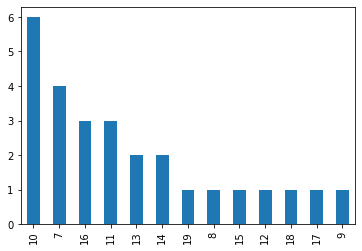

In [ ]:
df[df['studytime']==4]['G1'].value_counts().plot.bar()

**¿Por que razon los estudiantes estan  matriculados en dicho colegio?**

Haciendo un análisis del tipo de razon por la cual los estudiantes decidieron asistir al dicho colegio, se encontraron 4 motivos: course(preferencia del curso),home(cerca de casa), reputation(reputacion de la escuela) y other(otro motivo). Con el análisis se pudo determinar que la mayor razon por la que estan incritos se debe a la preferencia del curso representado con un porcentaje del 36,7%

In [ ]:
df['reason'].describe()

count        395
unique         4
top       course
freq         145
Name: reason, dtype: object

In [ ]:
df.groupby("reason").agg(frequency=("reason", "count"))

,frequency
reason,
course,145
home,109
other,36
reputation,105


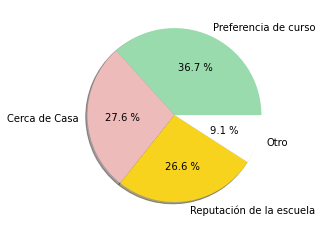

In [ ]:
plt.pie(df['reason'].value_counts(), shadow=True, autopct="%0.1f %%", labels=['Preferencia de curso','Cerca de Casa', 'Reputación de la escuela', 'Otro'], colors=["#99DBAD", "#ECBBBA",  "#F7D31E","#ffffff"])
plt.show()

**número de mujeres y hombre matriculados**

In [ ]:
df.groupby("sex").agg(frequency=("sex", "count"))

,frequency
sex,
F,208
M,187


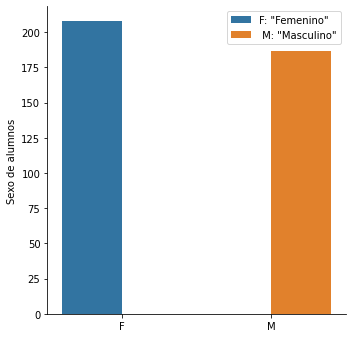

In [ ]:
sb.catplot(x='sex', hue ='sex',kind ="count", data = df)
plt.xlabel('')
plt.ylabel('Sexo de alumnos')
plt.legend(['F: "Femenino"',' M: "Masculino"'])

**Análisis para la edad**

In [ ]:
PromedioEdad=df['age'].mean()
EdadMin= df['age'].min()
EdadMax= df['age'].max()
print('Promedio de la edad:', PromedioEdad)
print('Edad Minima:' ,EdadMin)
print('Edad Maxima:', EdadMax)



Promedio de la edad: 16.696202531645568
Edad Minima: 15
Edad Maxima: 22


**Segun la edad¿Quien se dedica más al estudio?**

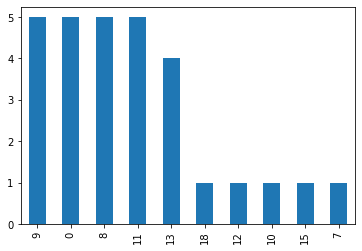

In [ ]:
df[df['age']>=19]['G3'].value_counts().plot.bar()


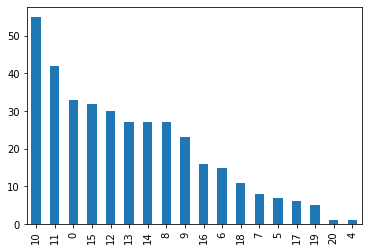

In [ ]:
df[df['age']<=18]['G3'].value_counts().plot.bar()

**¿Cúales con las notas de los estudiantes que toman clases extras en comparación a los que no?**

<function matplotlib.pyplot.show>

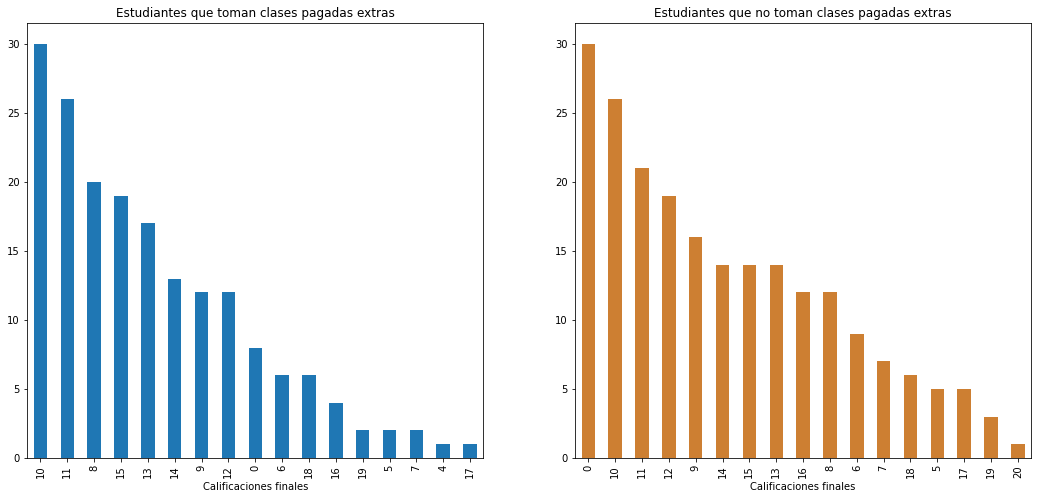

In [ ]:
f, ax = plt.subplots(1,2,figsize = (18,8))
(df[df['paid']=='yes']['G3']).value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Estudiantes que toman clases pagadas extras')
ax[0].set_xlabel('Calificaciones finales')

(df[df['paid']=='no']['G3']).value_counts().plot.bar(ax = ax[1], color = ['#CD7F32'])
ax[1].set_title('Estudiantes que no toman clases pagadas extras')
ax[1].set_xlabel('Calificaciones finales')

plt.show #presentar gráficas

**¿Cúantos estudiantes desean cursar estudios superiores?**

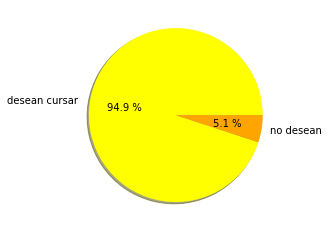

In [ ]:

plt.pie(df['higher'].value_counts(), shadow=True, autopct="%0.1f %%", labels=['desean cursar ','no desean'], colors=["yellow",  "orange"])
plt.show()

In [ ]:
print(df.shape)
print(df.describe())

(395, 33)
              age        Medu        Fedu  ...          G1          G2          G3
count  395.000000  395.000000  395.000000  ...  395.000000  395.000000  395.000000
mean    16.696203    2.749367    2.521519  ...   10.908861   10.713924   10.415190
std      1.276043    1.094735    1.088201  ...    3.319195    3.761505    4.581443
min     15.000000    0.000000    0.000000  ...    3.000000    0.000000    0.000000
25%     16.000000    2.000000    2.000000  ...    8.000000    9.000000    8.000000
50%     17.000000    3.000000    2.000000  ...   11.000000   11.000000   11.000000
75%     18.000000    4.000000    3.000000  ...   13.000000   13.000000   14.000000
max     22.000000    4.000000    4.000000  ...   19.000000   19.000000   20.000000

[8 rows x 16 columns]


correlacion

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


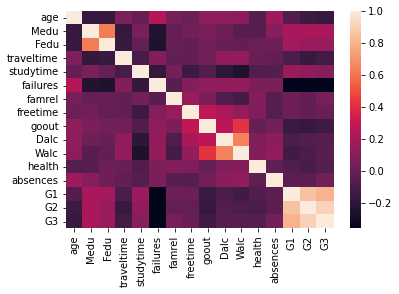

In [ ]:
corr= data.corr()
sb.heatmap(corr)
corr


**¿existe un acorrelacion entre G2 y G3?**

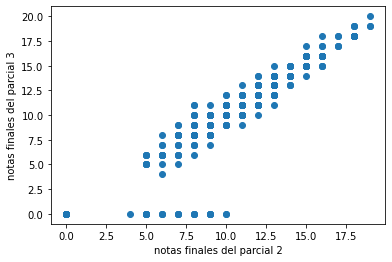

In [ ]:
plt.scatter(df['G2'],df['G3'])
plt.xlabel('notas finales del parcial 2')
plt.ylabel('notas finales del parcial 3')
plt.show()

##**Conclusiones de la explorcion de datos**


* En el anális exploratorio se evidencia que no existe una correlación directa de las variables a excepcion de las variables de notas finales de cada parcial.
* Se observa que hay un bajo rendimieto en  las notas finales de cada parcial..
* Los estudiantes que toman clases extras pagadas tienen calificaciones finales mayores con relacion a los estudiantes que no las toman. 
* Las gráficas de las variables que se estan analizando permiten una representación mejorada de los datos, con estos es más facil el entendimiento.

#**MACHINE LEARNING**

##**Problema  A Resolver**

¿Cuáles son los factores que influyen para que el estudiente apruebe o repruebe el tercer Parcial?

El problema que se quiere resolver es acerca de  que caracteríticas influyen en la calificacion final de los estudiantes. Por ello se va hacer una relacion entre la calificación Final(G3) y otras variables para saber cual de ellas influye mas. Teniendo encuenta esto se van a elmminar las columnas que no se creen necesarias utilizar en el  proyecto

In [5]:
#Nos quedamos con un total de 7 columnas
datos= df.drop(['famsup','famrel','school','guardian','age','address','famsize','schoolsup','Medu','Fedu','Mjob','Fjob','reason','traveltime','Pstatus','sex','activities','nursery','higher','internet','goout','freetime','Dalc','Walc', 'paid', 'failures'], axis=1)
datos

,studytime,romantic,health,absences,G1,G2,G3
0,2,no,3,6,5,6,6
1,2,no,3,4,5,5,6
2,2,no,3,10,7,8,10
3,3,yes,5,2,15,14,15
4,2,no,5,4,6,10,10
...,...,...,...,...,...,...,...
390,2,no,4,11,9,9,9
391,1,no,2,3,14,16,16
392,1,no,3,3,10,8,7
393,1,no,5,0,11,12,10


Si se observa la **variable G3**, muestra las notas que tienen los estudiaste entre 0 y 20. Sim embargo, se quiere analizar si los educandos aprueba o no el parcial, por lo que es necesario **transformar** esos valores en **números binarios**, de tal forma que los estudiante que esten por **debajo de 10** tengan el valor de **0 (Reprobados) ** y los que estan **por enciama de 10** el valor de **1 (aprobados)**. Para ellos se va a utilizar el siguiente comando.

In [6]:
datos['G3'] = datos['G3'].apply(lambda x: 0 if x < 10 else 1)
datos['G3'].unique()
datos

,studytime,romantic,health,absences,G1,G2,G3
0,2,no,3,6,5,6,0
1,2,no,3,4,5,5,0
2,2,no,3,10,7,8,1
3,3,yes,5,2,15,14,1
4,2,no,5,4,6,10,1
...,...,...,...,...,...,...,...
390,2,no,4,11,9,9,0
391,1,no,2,3,14,16,1
392,1,no,3,3,10,8,0
393,1,no,5,0,11,12,1


Ahora **G3** tiene valores **numericos binarios**. Con estos valores se  puede ver cuantos estudiantes hay aprovados y cuantos reprovados mediate un digrama circular.

In [7]:
datos.groupby("G3").agg(frequency=("G3", "count"))

,frequency
G3,
0,130
1,265


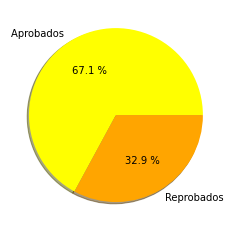

In [8]:
plt.pie(datos['G3'].value_counts(), shadow=True, autopct="%0.1f %%", labels=['Aprobados ','Reprobados'], colors=["yellow",  "orange"])
plt.show()

Sin embargo hay otro problema en el datset.Si nos fijamos en la **columna romantic** , se observa **valores no numéricos**, por lo que será necesario hacer una **coversion a valores binarios**. Como se tratan de valores categoricos, se puede hacer la tranofrmacion con la misma linea de codigo que se utilizó para la variable anterior de tal forma que la **palabra no, sera un 0** y la **palabra si, equivaldrá a 1**

In [9]:
datos['romantic'] = datos['romantic'].apply(lambda x: 0 if x=='no' else 1)
datos['romantic'].unique()
datos

,studytime,romantic,health,absences,G1,G2,G3
0,2,0,3,6,5,6,0
1,2,0,3,4,5,5,0
2,2,0,3,10,7,8,1
3,3,1,5,2,15,14,1
4,2,0,5,4,6,10,1
...,...,...,...,...,...,...,...
390,2,0,4,11,9,9,0
391,1,0,2,3,14,16,1
392,1,0,3,3,10,8,0
393,1,0,5,0,11,12,1


Antes de pasar a la parte del **Machine Learning** es necesario comprobar que no existan valores nulos en el **dataset**

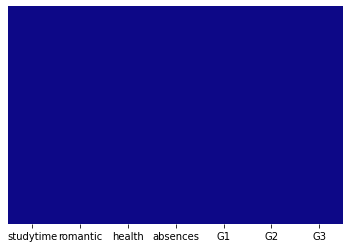

In [10]:
sb.heatmap(datos.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [11]:
#Resumen del dataset
print(datos.shape)

(395, 7)


In [12]:

datos.describe()

,studytime,romantic,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,0.334177,3.554430,5.708861,10.908861,10.713924,0.670886
std,0.839240,0.472300,1.390303,8.003096,3.319195,3.761505,0.470487
min,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,0.000000,8.000000,9.000000,0.000000
50%,2.000000,0.000000,4.000000,4.000000,11.000000,11.000000,1.000000
75%,2.000000,1.000000,5.000000,8.000000,13.000000,13.000000,1.000000
max,4.000000,1.000000,5.000000,75.000000,19.000000,19.000000,1.000000


In [13]:
#mas nformacin
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   studytime  395 non-null    int64
 1   romantic   395 non-null    int64
 2   health     395 non-null    int64
 3   absences   395 non-null    int64
 4   G1         395 non-null    int64
 5   G2         395 non-null    int64
 6   G3         395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB


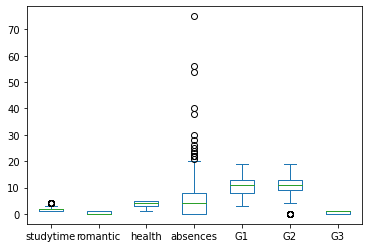

In [14]:
# graficando el dataset
datos.plot(kind='box', sharex=False, sharey=False)

[None, None, None, None, None, None, None, None, None]

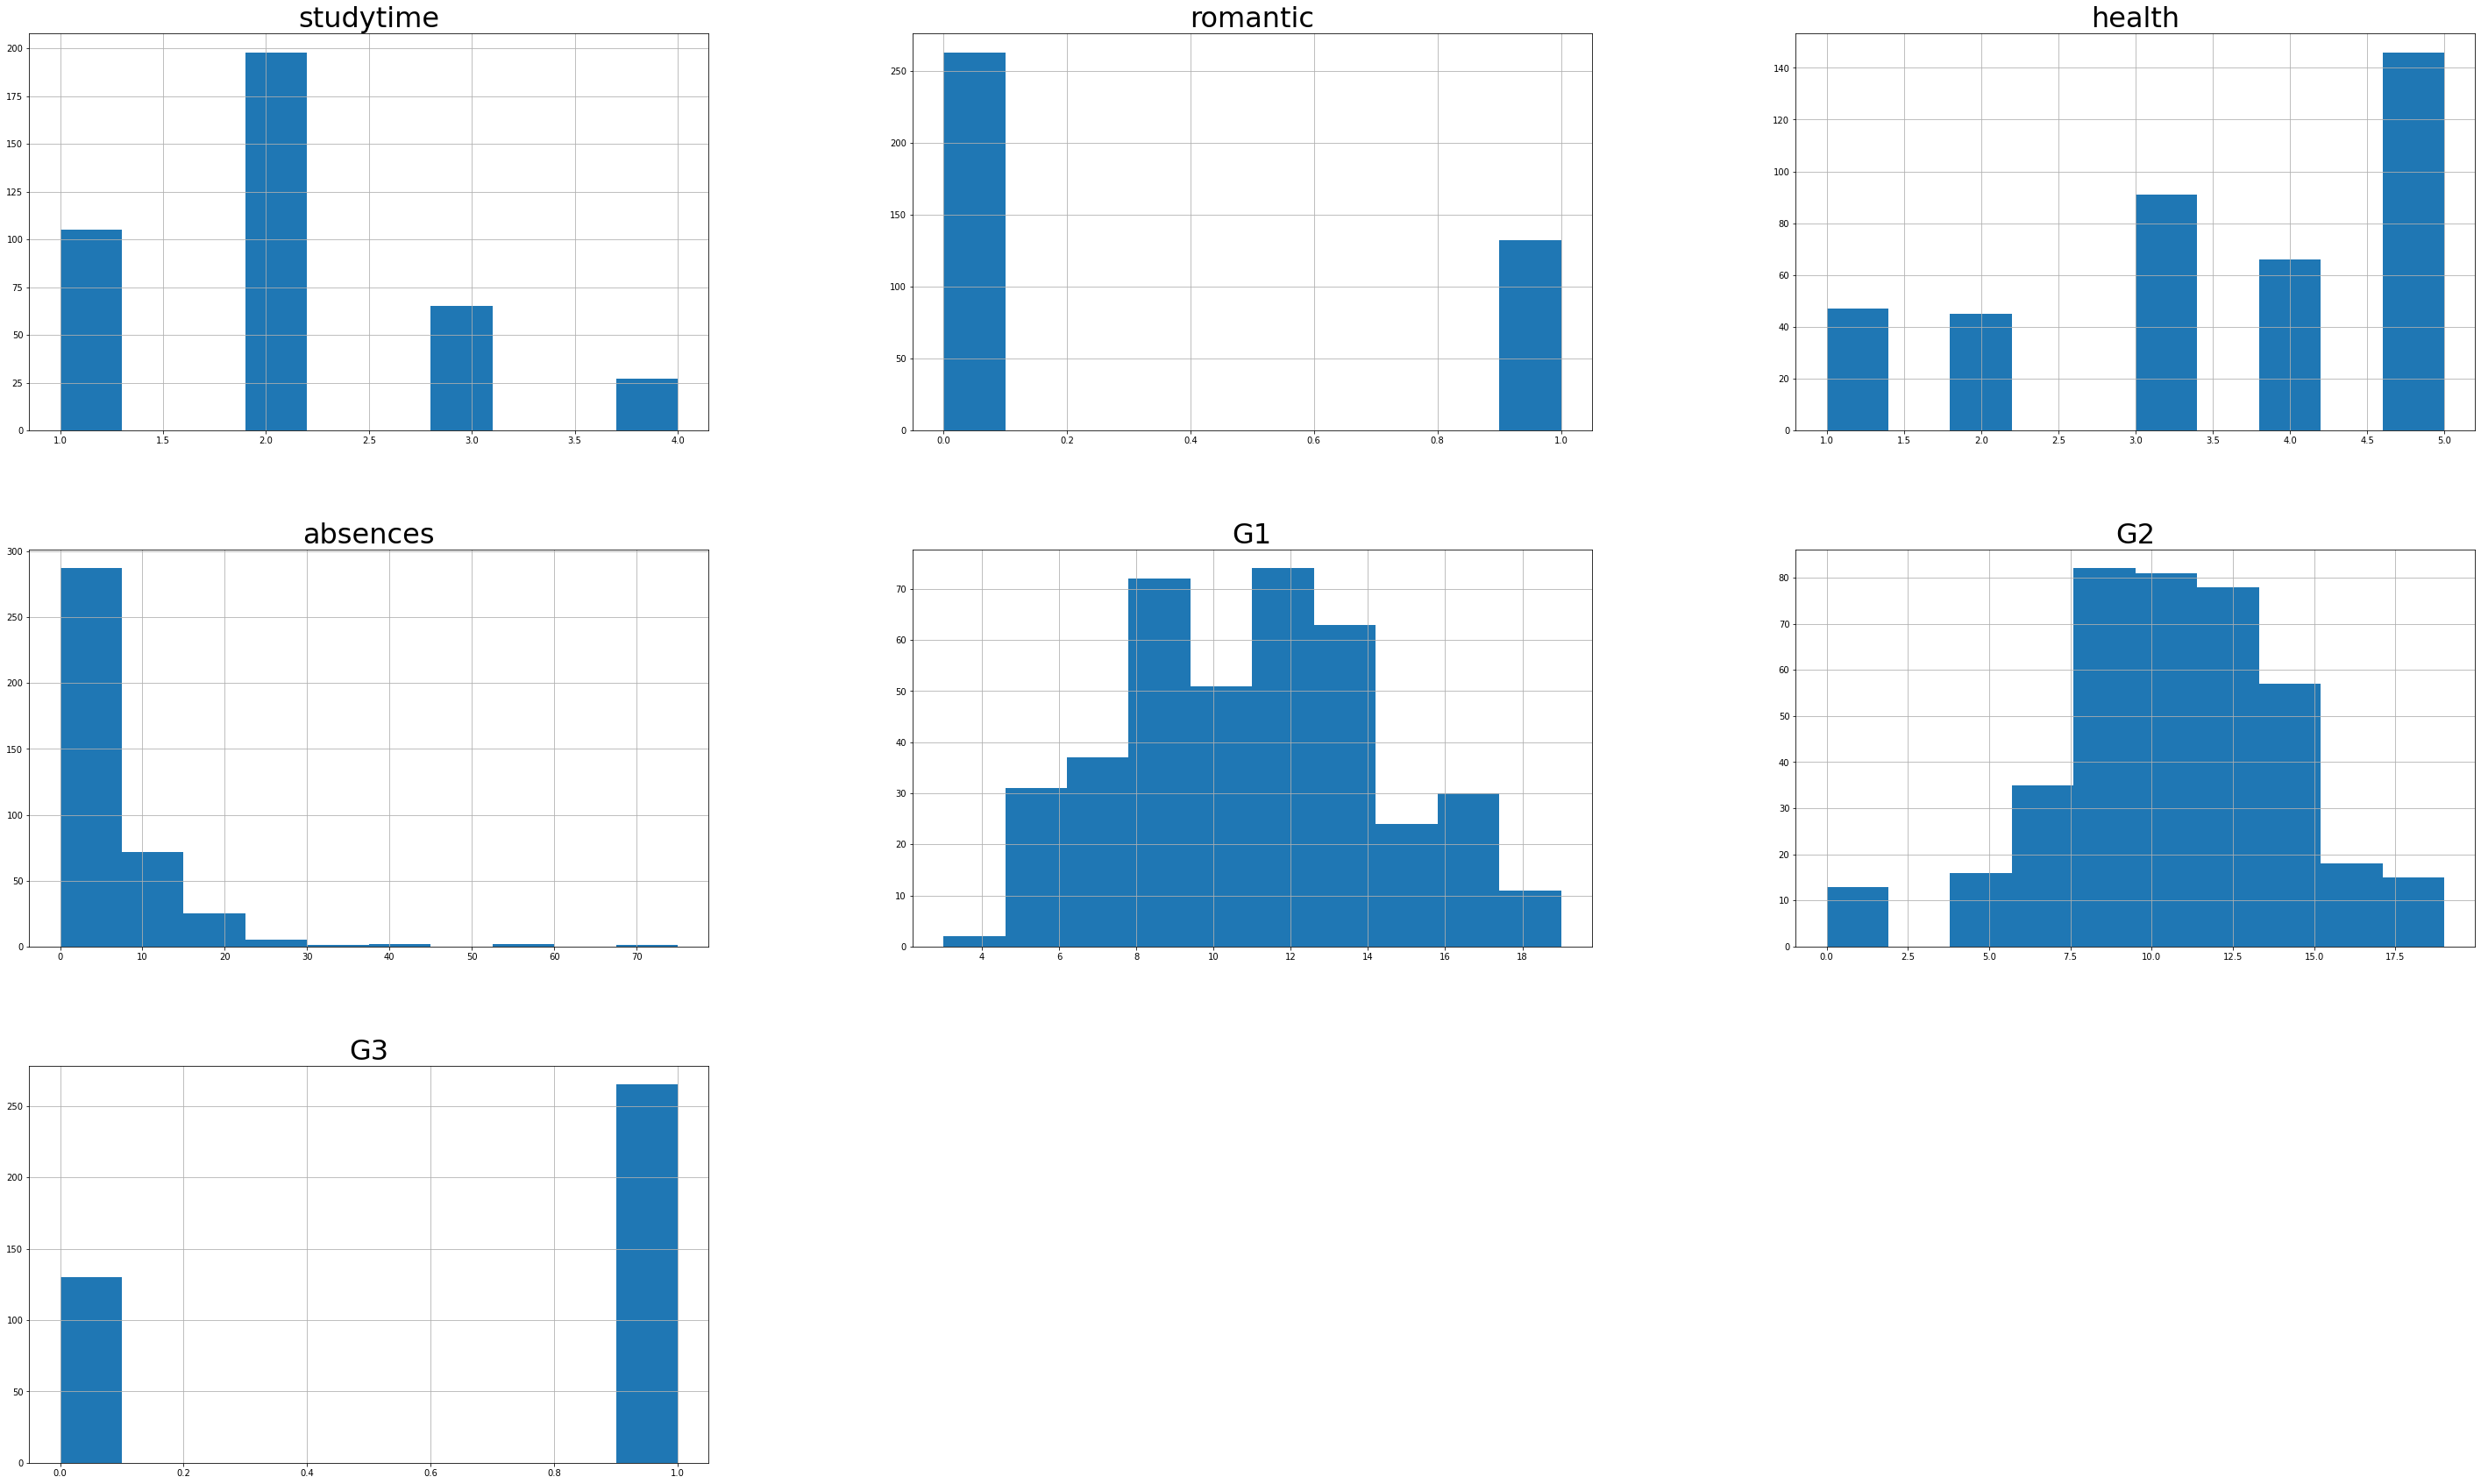

In [16]:
# histogramas
fig = datos.hist(figsize=(50, 30))
[x.title.set_size(32) for x in fig.ravel()]
#datos.hist(edgecolor='red', linewidth=1)

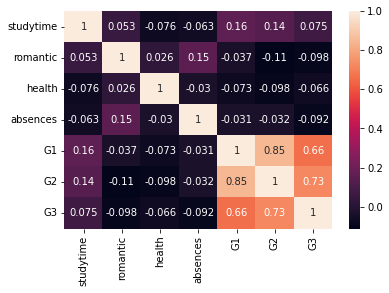

In [17]:
sb.heatmap(datos.corr(), annot=True)

# **Algoritmos de aprendizaje supervisado (clasificación y regresión)**

**Importando métricas para evaluación**

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Separando los datos en variables dependientes e independientes y dividiendo el dataset en entrenamiento y prueba

In [19]:
datos

,studytime,romantic,health,absences,G1,G2,G3
0,2,0,3,6,5,6,0
1,2,0,3,4,5,5,0
2,2,0,3,10,7,8,1
3,3,1,5,2,15,14,1
4,2,0,5,4,6,10,1
...,...,...,...,...,...,...,...
390,2,0,4,11,9,9,0
391,1,0,2,3,14,16,1
392,1,0,3,3,10,8,0
393,1,0,5,0,11,12,1


In [20]:
#Se obtienen las variables independientes
X = datos.drop(['G3'], axis=1)
X.head()

,studytime,romantic,health,absences,G1,G2
0,2,0,3,6,5,6
1,2,0,3,4,5,5
2,2,0,3,10,7,8
3,3,1,5,2,15,14
4,2,0,5,4,6,10


In [22]:
#Se obtienen las variables depedientes
Y=datos.pop('G3')
Y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64

In [23]:
# Se separan los datos para ajuste y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0],X_test.shape[0]))


Son 276 datos para entrenamiento y 119 datos para prueba


# **Regresión Logística**

Desarrollada por David Cox en 1958, es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor. 


**Ventajas**
*   Rara vez existe sobreajuste
*   El uso de la regularización es efectivo en la selección de funciones.
*   Rápido para entrenar.
* Fácil de entrenar sobre grandes datos gracias a su versión estocástica.
* Fácil de entender y explicar

**Desventajas**


*   Tienes que trabajar duro para que se ajuste a los datos no lineales.
*   Puede sufrir con valores atípicos.
* En algunas ocasiones es muy simple para captar relaciones complejas entre variables.

In [24]:
# Regresión Logística
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()# se define el mdelo
classifier.fit(X_train, y_train) # se entrena el modelo

y_pred = classifier.predict(X_test) # se realiza una prediiccion
print((y_pred)[0:20])
print(Y.head(20))

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1]
0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: G3, dtype: int64


**Matrix de confusión**

Es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

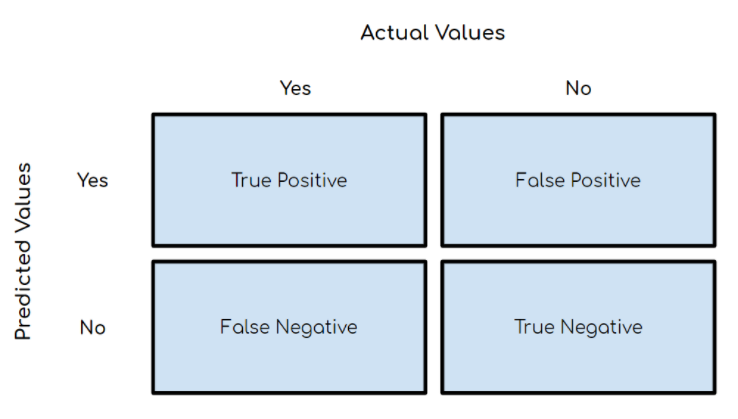



* **Verdadero positivo**: El valor real es positivo y  la prueba predijo tambien que era positivo. O bien una persona está enferma y la prueba así lo demuestra.
Verdadero negativo: El valor real  es negativo y la prueba predijo tambien que el resultado era negativo. O bien la persona no está enferma y la prueba así lo  demuestra.
* **Falso negativo**: El valor real es positivo, y la prueba predijo  que el resultado es negativo. La persona está enferma, pero la prueba dice de manera incorrecta que no lo está. Esto es lo que en estadística se conoce como error tipo II
* **Falso positivo**: El valor real es negativo, y la prueba predijo  que el resultado es positivo. La persona no está enferma, pero la prueba nos dice de manera incorrecta que silo está.

In [25]:
print(confusion_matrix(y_test, y_pred))

[[39 11]
 [ 5 64]]


In [26]:
from sklearn.metrics import precision_score
print('la presición del modelo es de :',precision_score(y_pred,y_test))
from sklearn.metrics import accuracy_score
print('la exactitud del modelo es de :',accuracy_score(y_pred,y_test))

la presición del modelo es de : 0.927536231884058
la exactitud del modelo es de : 0.865546218487395


In [27]:
print(y_pred)
a=classifier.predict_proba(X_train)
print(a)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1
 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 1 0 1]
[[8.90789972e-06 9.99991092e-01]
 [2.04803530e-02 9.79519647e-01]
 [5.63660630e-04 9.99436339e-01]
 [4.06075830e-04 9.99593924e-01]
 [9.99999398e-01 6.02467294e-07]
 [3.49467721e-02 9.65053228e-01]
 [3.06038785e-06 9.99996940e-01]
 [2.11056254e-03 9.97889437e-01]
 [7.68721410e-07 9.99999231e-01]
 [2.06669692e-01 7.93330308e-01]
 [7.59345021e-04 9.99240655e-01]
 [5.72500086e-07 9.99999427e-01]
 [8.39088397e-01 1.60911603e-01]
 [1.77022585e-03 9.98229774e-01]
 [3.98305021e-04 9.99601695e-01]
 [1.71143261e-01 8.28856739e-01]
 [8.91571602e-01 1.08428398e-01]
 [1.13266967e-01 8.86733033e-01]
 [2.70954025e-02 9.72904597e-01]
 [6.25265899e-01 3.74734101e-01]
 [5.93716996e-04 9.99406283e-01]
 [9.98137385e-01 1.86261486e-03]
 [1.52864778e-01 8.47135222e-01

In [28]:
#Se guarda el modelo en el repositorio

import pickle
pkl_filename='Regresión_Logistica.pkl'
with open(pkl_filename, 'wb')as file:
  pickle.dump(classifier,file)

In [29]:
x_in=np.asarray([2,1,5,10,10,10]).reshape(1,-1)
predict=classifier.predict(x_in)
print(predict[0])
a=classifier.predict_proba(x_in)
print(*a)

1
[0.21745606 0.78254394]


# **Naive Bayes**

Naive Bayes o el Ingenuo Bayes es uno de los algoritmos más simples y poderosos para la clasificación basado en el Teorema de Bayes con una suposición de independencia entre los predictores. Naive Bayes es fácil de construir y particularmente útil para conjuntos de datos muy grandes.

El clasificador Naive Bayes asume que el efecto de una característica particular en una clase es independiente de otras características. 

**Ventajas**

* Es fácil y rápido predecir la clase de conjunto de datos de prueba. También funciona bien en la predicción multiclase.
* Cuando se mantiene la suposición de independencia, un clasificador Naive Bayes funciona mejor en comparación con otros modelos como la Regresión Logística y se necesitan menos datos de entrenamiento.
* Funciona bien en el caso de variables de entrada categóricas comparada con variables numéricas.

**Desventajas**

Si la variable categórica tiene una categoría en el conjunto de datos de prueba, que no se observó en el conjunto de datos de entrenamiento, el modelo asignará una probabilidad de 0 y no podrá hacer una predicción. Esto se conoce a menudo como frecuencia cero. Para resolver esto, podemos utilizar la técnica de alisamiento.
Otra limitación de Naive Bayes es la asunción de predictores independientes. En la vida real, es casi imposible que obtengamos un conjunto de predictores que sean completamente independientes.
Naive Bayes es el algoritmo más sencillo y potente. A pesar de los significativos avances de Machine Learning en los últimos años, ha demostrado su valía. Se ha implementado con éxito en muchas aplicaciones, desde el análisis de texto hasta los motores de recomendación.

In [30]:
# Support Vector Machine's 

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC

bayes = SVC(probability=True)
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Precision del modelo
from sklearn.metrics import precision_score
print('la presición del modelo es de :',precision_score(y_pred,y_test))

# Exactitud del modelo
from sklearn.metrics import accuracy_score
print('la exactitud del modelo es de :',accuracy_score(y_pred,y_test))



[[34 16]
 [ 4 65]]
la presición del modelo es de : 0.9420289855072463
la exactitud del modelo es de : 0.8319327731092437


In [31]:
x_in=np.asarray([2,1,5,10,10,10]).reshape(1,-1)
predict=bayes.predict(x_in)
print(predict[0])
b=bayes.predict_proba(x_in)
print(*b)

1
[0.22610468 0.77389532]


In [32]:
pkl_filename='Naive_Bayes.pkl'
with open(pkl_filename, 'wb')as file:
  pickle.dump(bayes,file)